# Updated DM

I have updated the dispersion metric (DM) because I had issues to it, tried something to improve it, and found that it worked. Now I need to write it up. The purpose of this notebook is to find a case against the vanilla DM so that I have a compelling starting point for the update. So the idea is to find a function for which the DM (specifically with m=0.1n) performs poorly as an indicator of underlying landscape structure; or whatever it was that lead me here in ther first place.

### Idea

Seems like it already kinda fails for Schwefel 2.26. We should just check which functions Katherine said are supposed to be multimodal and check what kind of measurements we get. Hopefully we can show that the ideal m value differs for each function.

In [2]:
%load_ext autoreload
%autoreload 2

In [11]:
import numpy as np

from psodroc.benchmarks import schwefel_2_26 as bm
from psodroc.measures import funnels

D = 1
E = 30

dms = []
for e in range(E):
    dm = funnels._DM(bm.function, bm.min(0), bm.max(0), D, 1000, .2)
    dms.append(dm)

dm_avg = np.average(dms)
print dm_avg

0.0199318698197


### Which functions?

- Schwefel 2.26
- Table legs (?)
- (Own -- upside down spherical/others?)
- Rana (dammit!)

So let's add Rana

In [41]:
import numpy as np

def function(xs):
    return np.sum(_inner(xi, xi1) for xi, xi1 in zip(xs[:-1], xs[1:]))

def _inner(xi, xi1):
    t1 = np.sqrt(np.abs(xi1 + xi + 1))
    t2 = np.sqrt(np.abs(xi1 - xi + 1))
    return (xi1 + 1) * np.cos(t2) * np.sin(t1) \
        + xi * np.cos(t1) * np.sin(t2)


Ok now let's plot DM for different m values to show that, while we expcect DM to show that these functions are multi-funneled, it doesn't always.

<module 'psodroc.benchmarks.levy13_generalized' from 'psodroc/benchmarks/levy13_generalized.pyc'> . . . . . . . . . . 


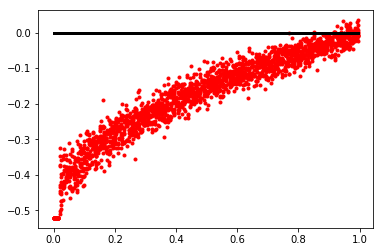

In [85]:
import numpy as np
from matplotlib import pyplot as plt

from psodroc.benchmarks import schwefel_2_26, rana, spherical, rastrigin, alpine, levy13_generalized
from psodroc.measures import funnels

D = 2 # number of dimensions
es = range(10) # number of experiments
ms = np.arange(0., 1., .005) # m-values

# bms = [rana, schwefel_2_26, spherical, rastrigin]
# bms = [rana]
# bms = [schwefel_2_26]
# bms = [spherical]
bms = [levy13_generalized]


colors = ['r', 'b', 'g', 'y']

for bm, color in zip(bms, colors):
    print bm,

#     dm_avgs = []
#     for m in ms:
#         print '.',
#         dms = []
#         for e in es:
#             dm = funnels._DM(bm.function, bm.min(0), bm.max(0), D, 100, m)
#             dms.append(dm)
#         dm_avg = np.average(dms)
#         dm_avgs.append(dm_avg)
#     plt.plot(ms, dm_avgs)

    for e in es:
        print '.',
        dms = []
        for m in ms:
            dm = funnels._DM(bm.function, bm.min(0), bm.max(0), D, 100, m)
            dms.append(dm)
        plt.plot(ms, dms, marker='.', linestyle='None', color=color)
        
    print ''
            

plt.plot(ms, np.zeros(len(ms)), 'k', lw=3)
plt.show()

In [107]:
import os
from tabulate import tabulate

rows = []

# Add a row for each benchmark

# from psodroc.benchmark import *
from results import benchmarks
# bms = [ackley, alpine, beale, bohachevsky1_generalized, eggholder, goldstein_price, griewank, levy13_generalized, michalewicz, pathological, quadric,
#        quartic, rana, rastrigin, rosenbrock, salomon, schwefel_2_22, schwefel_2_26, six_hump_camel_back, skew_rastrigin, spherical, step, weierstrass, zakharov]
# multi_modal_bms = [schwefel_2_22, rana]
from psodroc.measures import funnels

bm_names = [
    ('ackley', 'Ackley'),
    ('alpine', 'Alpine'),
    ('beale', 'Beale'),
    ('bohachevsky1_generalized', 'Bohachevksy'),
    ('eggholder', 'Egg Holder'),
    ('goldstein_price', 'Goldstein Price'),
    ('griewank', 'Griewank'),
    ('levy13_generalized', 'Levy 13'),
    ('michalewicz', 'Michalewicz'),
    ('pathological', 'Pathological'),
    ('quadric', 'Quadric'),
    ('quartic', 'Quartic'),
    ('rana', 'Rana'),
    ('rastrigin', 'Rastrigin'),
    ('rosenbrock', 'Rosenbrock'),
    ('salomon', 'Salomon'),
    ('schwefel_2_22', 'Schwefel 2.22'),
    ('schwefel_2_26', 'Schwefel 2.26'),
    ('six_hump_camel_back', 'Six Hump Camel Back'),
    ('skew_rastrigin', 'Skew Rastrigin'),
    ('spherical', 'Spherical'),
    ('step', 'Step'),
    ('weierstrass', 'Weierstrass'),
    ('zakharov', 'Zakharov'),
]

multimodal_bm_names = [
    'rana',
    'schwefel_2_26',
]

es = range(5)

for bm_name in bm_names:
    print bm_name[1],
    bm = benchmarks.get(bm_name[0])
    dms = []
    dms_modified = []
    is_unimodal = True
    
    for e in es:
        print '.',
        row = []
        
        if e == 0:
            row.append(bm_name[1])
        else:
            row.append('')

        if bm_name[0] in multimodal_bm_names:
            row.append('Multimodal')
        else:
            row.append('Unimodal')

        dm = funnels._DM(bm.function, bm.min(0), bm.max(0), 2, 100, 0.1)
        incorrect = False
        if bm_name[0] in multimodal_bm_names:
            if dm < 0:
                incorrect = True
        else:
            if dm > 0:
                incorrect = True

        if incorrect:
            row.append("\033[1;31m{}\033[0m".format(dm))
        else:
            row.append("{}".format(dm))

        incorrect = False
        dm_max = funnels.DM(bm.function, bm.min(0), bm.max(0), 2)
        if bm_name[0] in multimodal_bm_names:
            if dm_max < 0:
                incorrect = True
        else:
            if dm_max > 0:
                incorrect = True
        if incorrect:
            row.append("\033[1;31m{}\033[0m".format(dm_max))
        else:
            row.append("{}".format(dm_max))

        rows.append(row)
    print ''


Ackley . . . . . 
Alpine . . . . . 
Beale . . . . . 
Bohachevksy . . . . . 
Egg Holder . . . . . 
Goldstein Price . . . . . 
Griewank . . . . . 
Levy 13 . . . . . 
Michalewicz . . . . . 
Pathological . . . . . 
Quadric . . . . . 
Quartic . . . . . 
Rana . . . . . 
Rastrigin . . . . . 
Rosenbrock . . . . . 
Salomon . . . . . 
Schwefel 2.22 . . . . . 
Schwefel 2.26 . . . . . 
Six Hump Camel Back . . . . . 
Skew Rastrigin . . . . . 
Spherical . . . . . 
Step . . . . . 
Weierstrass . . . . . 
Zakharov . . . . . 


In [108]:
print tabulate(rows, headers=['Function', 'Modality', 'DM', 'Modified DM'])

Function             Modality            DM    Modified DM
-------------------  ----------  ----------  -------------
Ackley               Unimodal    -0.335324      -0.245885
                     Unimodal    -0.370885      -0.243177
                     Unimodal    -0.314577      -0.253618
                     Unimodal    -0.305654      -0.244897
                     Unimodal    -0.360847      -0.246161
Alpine               Unimodal    -0.0855905     -0.123591
                     Unimodal    -0.10283       -0.13051
                     Unimodal    -0.25458       -0.124753
                     Unimodal    -0.199833      -0.126145
                     Unimodal    -0.129275      -0.125254
Beale                Unimodal    -0.153915      -0.186365
                     Unimodal    -0.197264      -0.184325
                     Unimodal    -0.303748      -0.190592
                     Unimodal    -0.238782      -0.187238
                     Unimodal    -0.24015       -0.183639
Bohachevksy  